# GreedyFilter Example

This notebook contains an example of how the GreedyFilter class can be used to keep only those rules which, when considered together, give the greatest performance.

## Requirements

To run, you'll need the following:

* Install the Rule Filtering package - see the readme for more information.
* A rule set (specifically the binary columns of the rules as applied to a dataset).
* The binary target column associated with the above dataset (or the standard rule_descriptions dataframe containing the rule performance metrics)

----

## Import packages

In [1]:
from rule_filtering.rule_filters import GreedyFilter

import pandas as pd
import numpy as np

## Read in data

Let's read in some dummy rules (stored as binary columns) and the target column.

In [2]:
X_rules_train = pd.read_csv('dummy_data/X_rules_train.csv', index_col='eid')
y_train = pd.read_csv('dummy_data/y_train.csv', index_col='eid').squeeze()
X_rules_test = pd.read_csv('dummy_data/X_rules_test.csv', index_col='eid')
y_test = pd.read_csv('dummy_data//y_test.csv', index_col='eid').squeeze()

----

## Filter rules which degrade combined performance

The process works by sorting the rules by a given performance metric, then iterating through the rules to calculate the performance of the top n combined rules (e.g. top 1 overall performance, top 2 overall performance, etc). When calculating the combined performance, the rules are connected with OR conditions. 

The top number of rules which give the highest overall performance are kept.

### Set up class parameters

Now we can set our class parameters for the GreedyOpt class. Here, we'll both sort the rules and optimise their combined performance by F1 score.

**Please see the class docstring for more information on each parameter.**

In [3]:
from rule_optimisation.optimisation_functions import FScore
f1 = FScore(beta=1)

**Note that the value for the *sorting_col* parameter is 'OptMetric', which is the standard column name for the custom metric (in this case, F1 score)**

In [4]:
params = {
    'opt_func': f1.fit,
    'sorting_col': 'OptMetric',
    'show_plots': True
}

### Instantiate class and run fit method

Once the parameters have been set, we can run the *.fit()* method to calculate which rules should be kept.

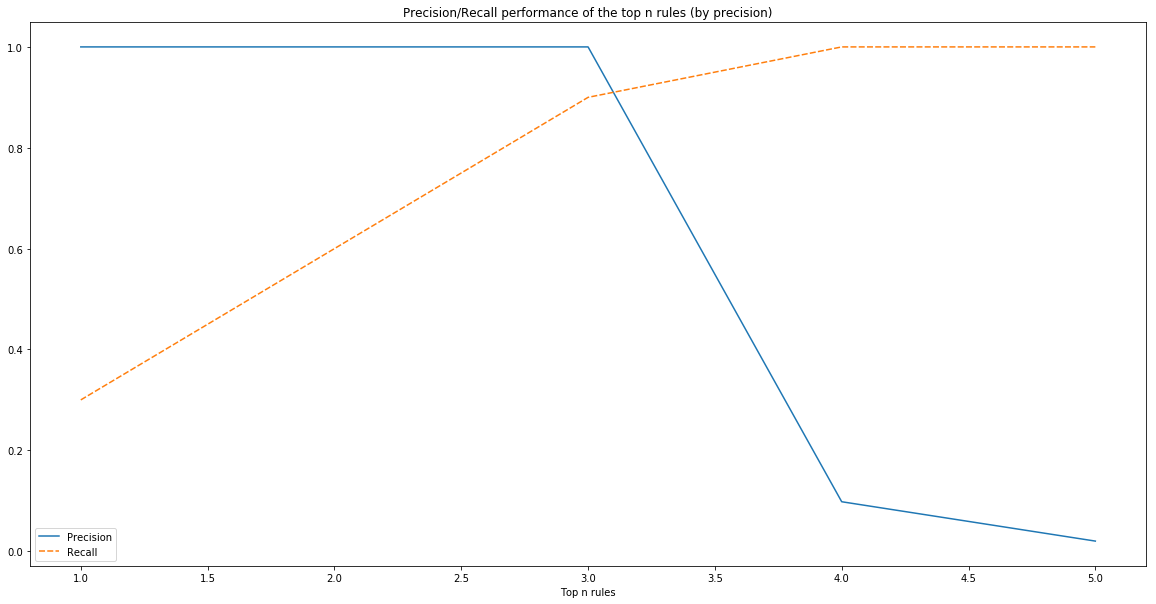

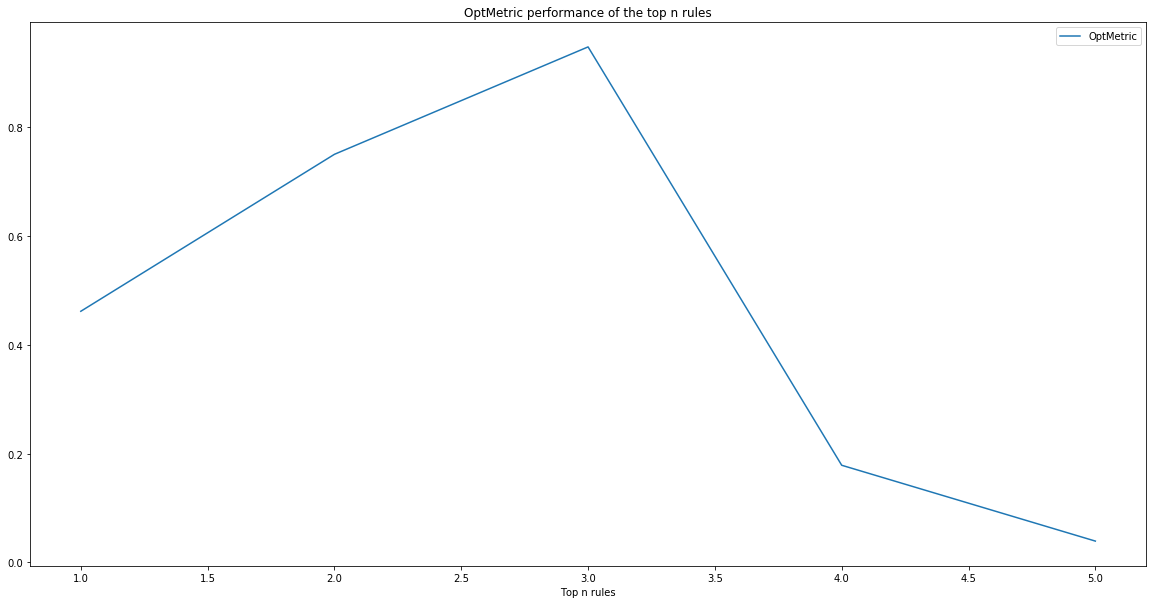

In [5]:
gf = GreedyFilter(**params)
gf.fit(X_rules=X_rules_train, y=y_train)

### Outputs

The *.fit()* method does not return anything. However it does create the following attribute:

* rules_to_keep: The list of rules which, when considered together, give the highest performance.

In [6]:
gf.rules_to_keep

['Rule1', 'Rule2', 'Rule3']

----

## Drop rules which degrade combined performance from another dataset

Use the *.transform()* method to drop the rules which degrade the combined performance from a given dataset.

In [7]:
X_rules_test_filtered = gf.transform(X_rules=X_rules_test)

### Outputs

The *.transform()* method returns a dataframe with the filtered rules dropped. It also filters the provided *rule_descriptions* dataframe and saves as a class attribute with the same name:

In [8]:
X_rules_test_filtered.head()

,Rule1,Rule2,Rule3
eid,,,
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [9]:
gf.rule_descriptions

,Precision,Recall,PercDataFlagged,OptMetric
Rule1,1.0,0.3,0.006,0.461538
Rule2,1.0,0.3,0.006,0.461538
Rule3,1.0,0.3,0.006,0.461538


----

## Calculate rules which degrade combined performance and drop them from a dataset (in one step)

You can also use the *fit_transform()* method to calculate the rules which degrade combined performance and drop them from the training set.

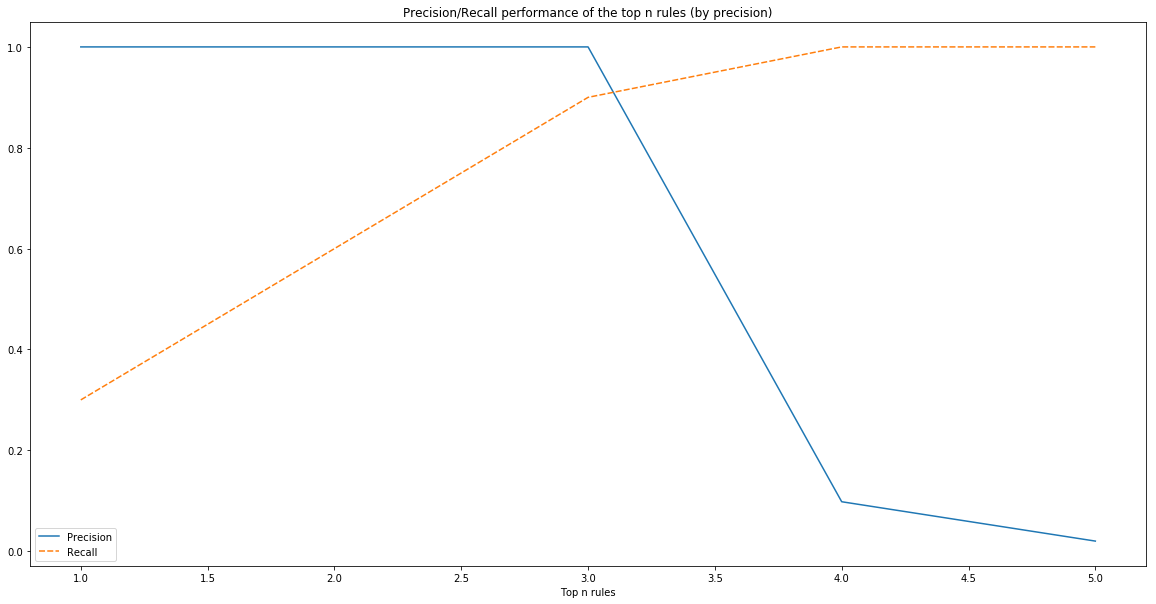

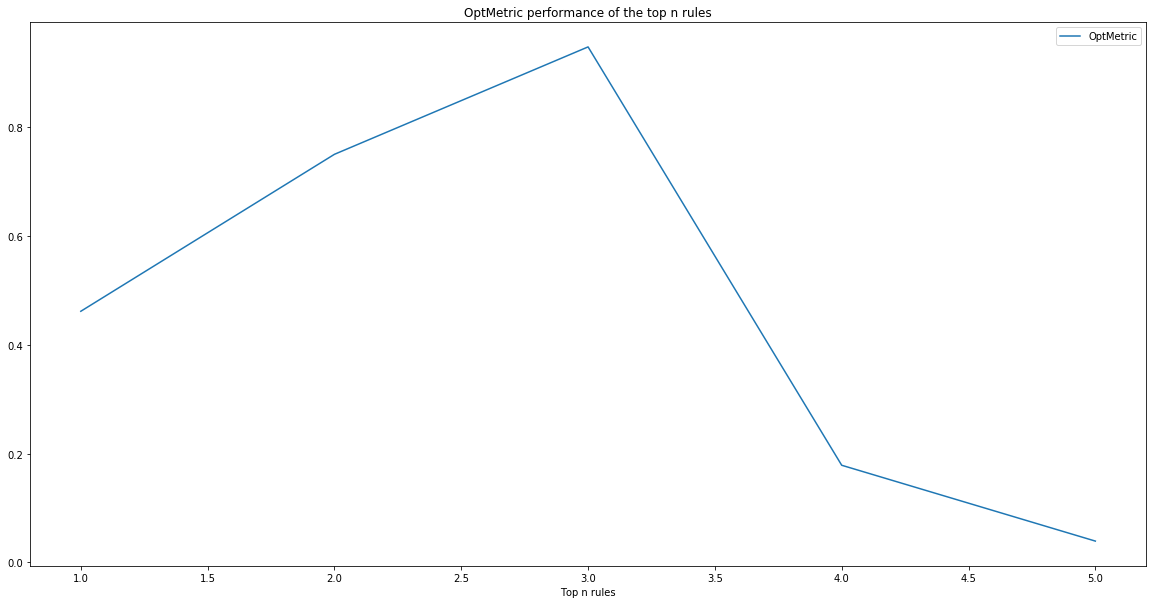

In [10]:
gf = GreedyFilter(**params)
X_rules_train_filtered = gf.fit_transform(X_rules=X_rules_train, y=y_train)

### Outputs

The *.fit_transform()* method returns a dataframe with the filtered rules dropped, while filtering the provided *rule_descriptions* dataframe and saving it as a class attribute with the same name. It also creates the following attribute:

* rules_to_keep: The list of rules which meet the filtering criteria.

In [11]:
gf.rules_to_keep

['Rule1', 'Rule2', 'Rule3']

In [12]:
X_rules_train_filtered.head()

,Rule1,Rule2,Rule3
eid,,,
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [13]:
gf.rule_descriptions

,Precision,Recall,PercDataFlagged,OptMetric
Rule1,1.0,0.3,0.006,0.461538
Rule2,1.0,0.3,0.006,0.461538
Rule3,1.0,0.3,0.006,0.461538


----

## The End

That's it folks - if you have any queries or suggestions please put them in the *#sim-datatools-help* Slack channel or email James directly.